In [1]:
import pickle
import os
import numpy as np
import glob
from matplotlib import pyplot as plt

In [40]:
root = './results'
# experiment = 'MOLHIV-20210518-himplike'  # ~ 190k params
experiment = 'MOLHIV-20210518-64-025-200'  # ~ 4M params (dropout on inputs as well)
seed = 43
folder = f'{root}/{experiment}/seed-{seed}/'

In [41]:
folder

'./results/MOLHIV-20210518-64-025-200/seed-43/'

In [42]:
try:
    path = folder+'curves.pkl'
    print(f'Reading from {path}')
    with open(path, 'rb') as handle:
        curves = pickle.load(handle)
except FileNotFoundError:
    print('Results not found.')

Reading from ./results/MOLHIV-20210518-64-025-200/seed-43/curves.pkl


In [43]:
curve_list = [curves]

In [44]:
def collect(curve_list, curve_name):
    return [[item for item in curves[curve_name]] for curves in curve_list]

def plot_curves(curves, ylim=None, agg=None, err_agg=None, anchors=None):
    plt.figure(dpi=300)
    if agg is not None:
        y_center = agg(np.asarray(curves), axis=0)
        if err_agg is not None:
            y_err = err_agg(np.asarray(curves), axis=0)
            plt.fill_between(range(len(curves[0])), y_center+y_err, y_center-y_err, alpha=0.2, color='cornflowerblue', linewidth=0.0)
        plt.plot(y_center, lw=0.5)
    else:
        for curve in curves:
            plt.plot(curve, lw=0.5)
    if anchors is not None:
        for anc in anchors:
            plt.axhline(y=anc, lw=0.3, color='lightgrey')
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()
    plt.close()

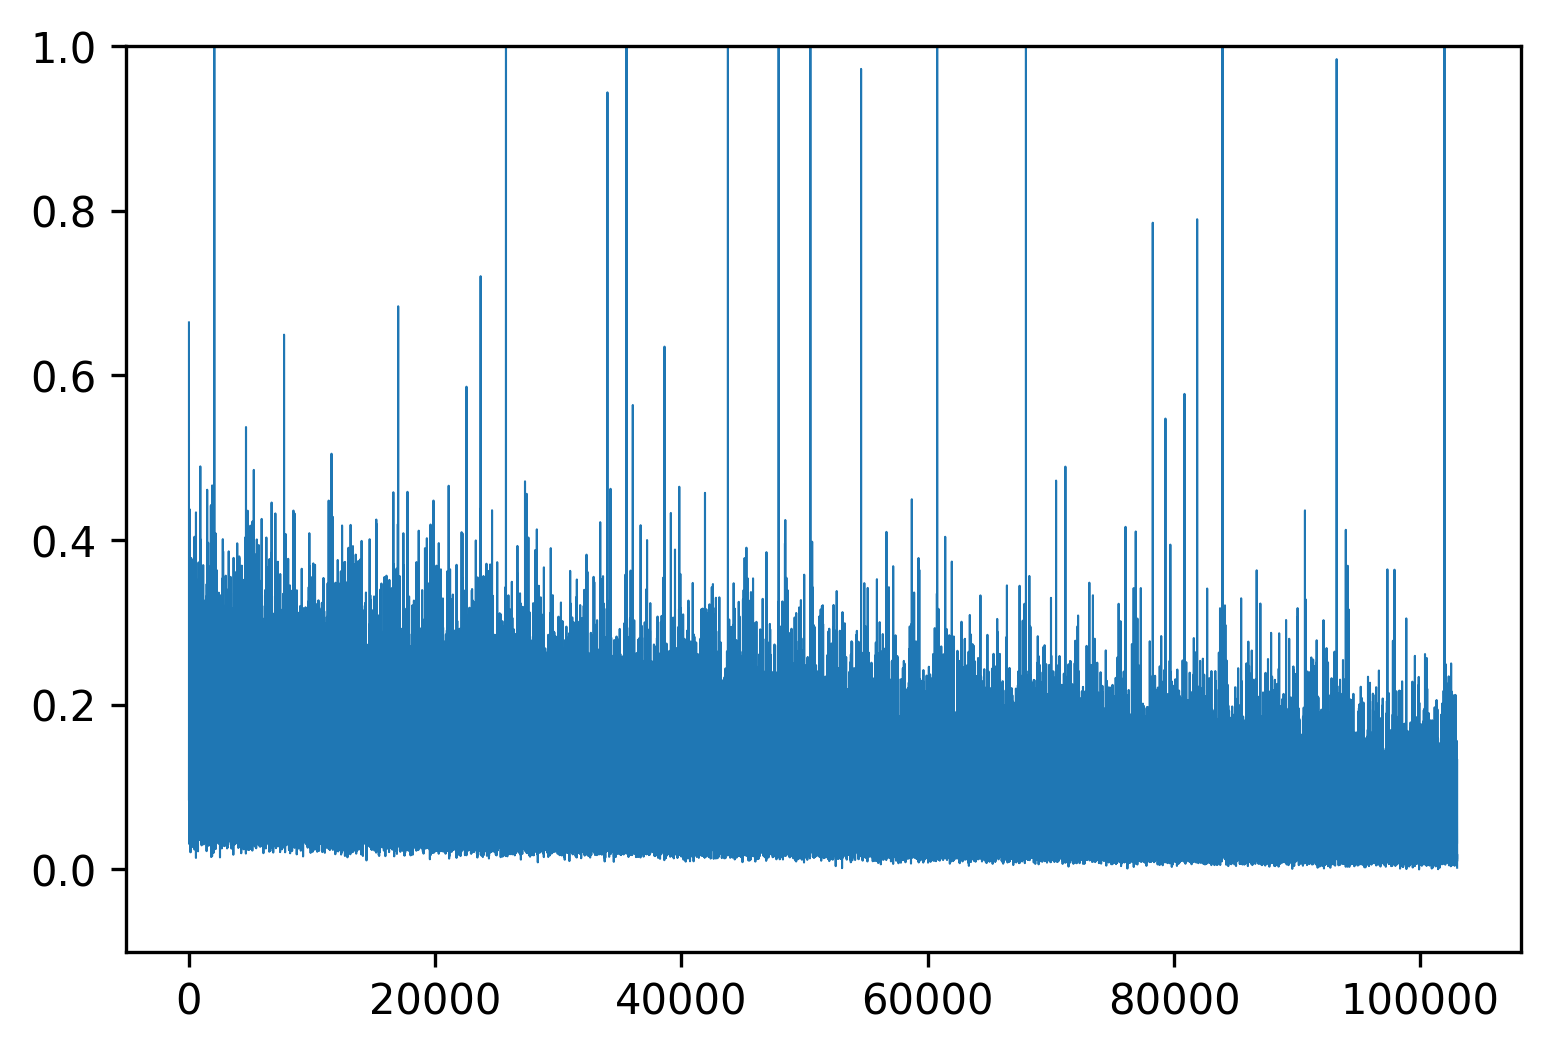

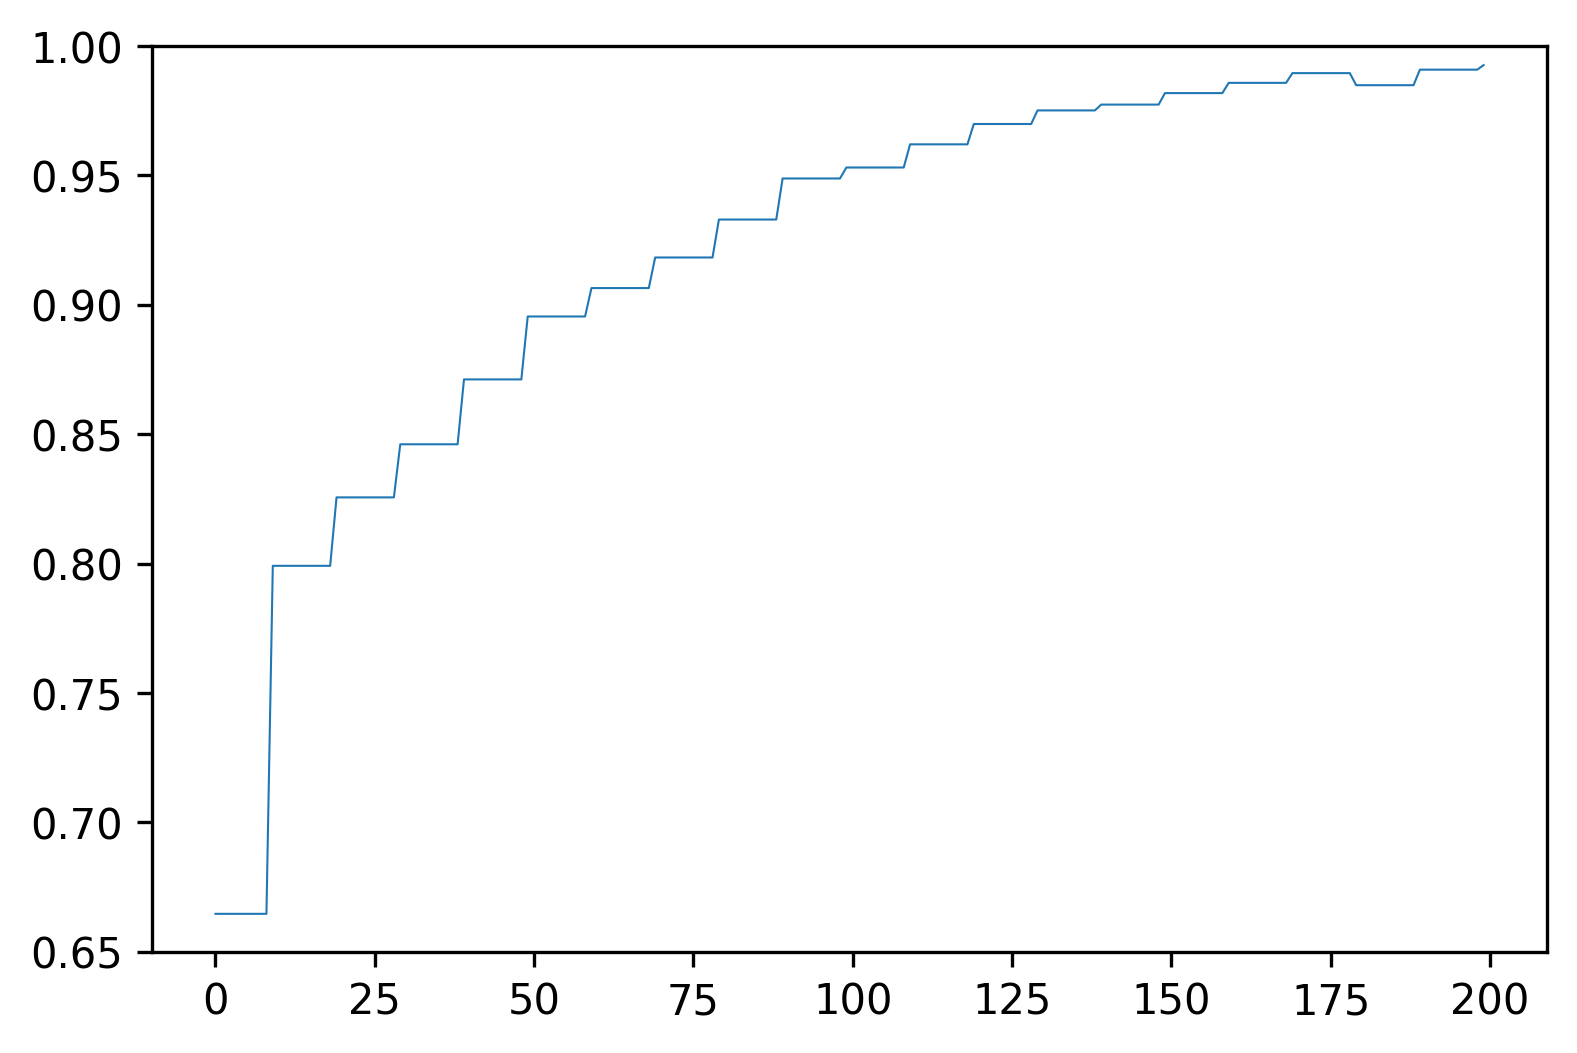

In [47]:
plot_curves(collect(curve_list, 'train_loss'), ylim=[-0.1, 1.0], agg=np.mean)
plot_curves(collect(curve_list, 'train'), ylim=[0.65, 1.00])

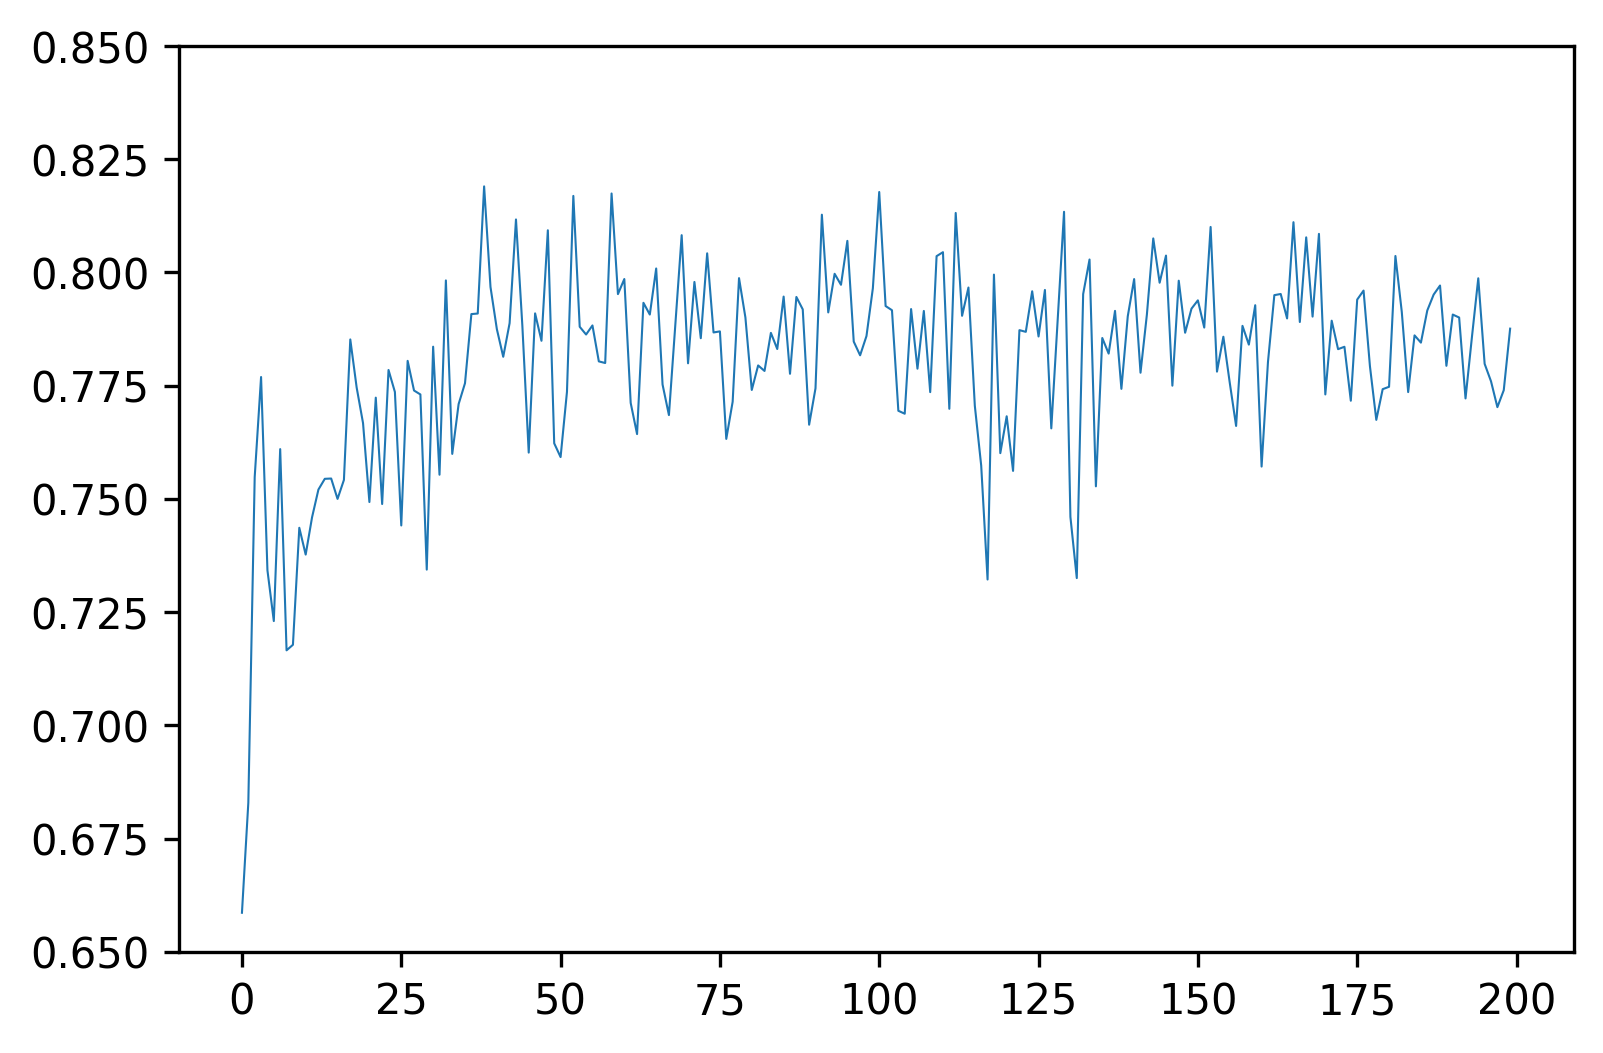

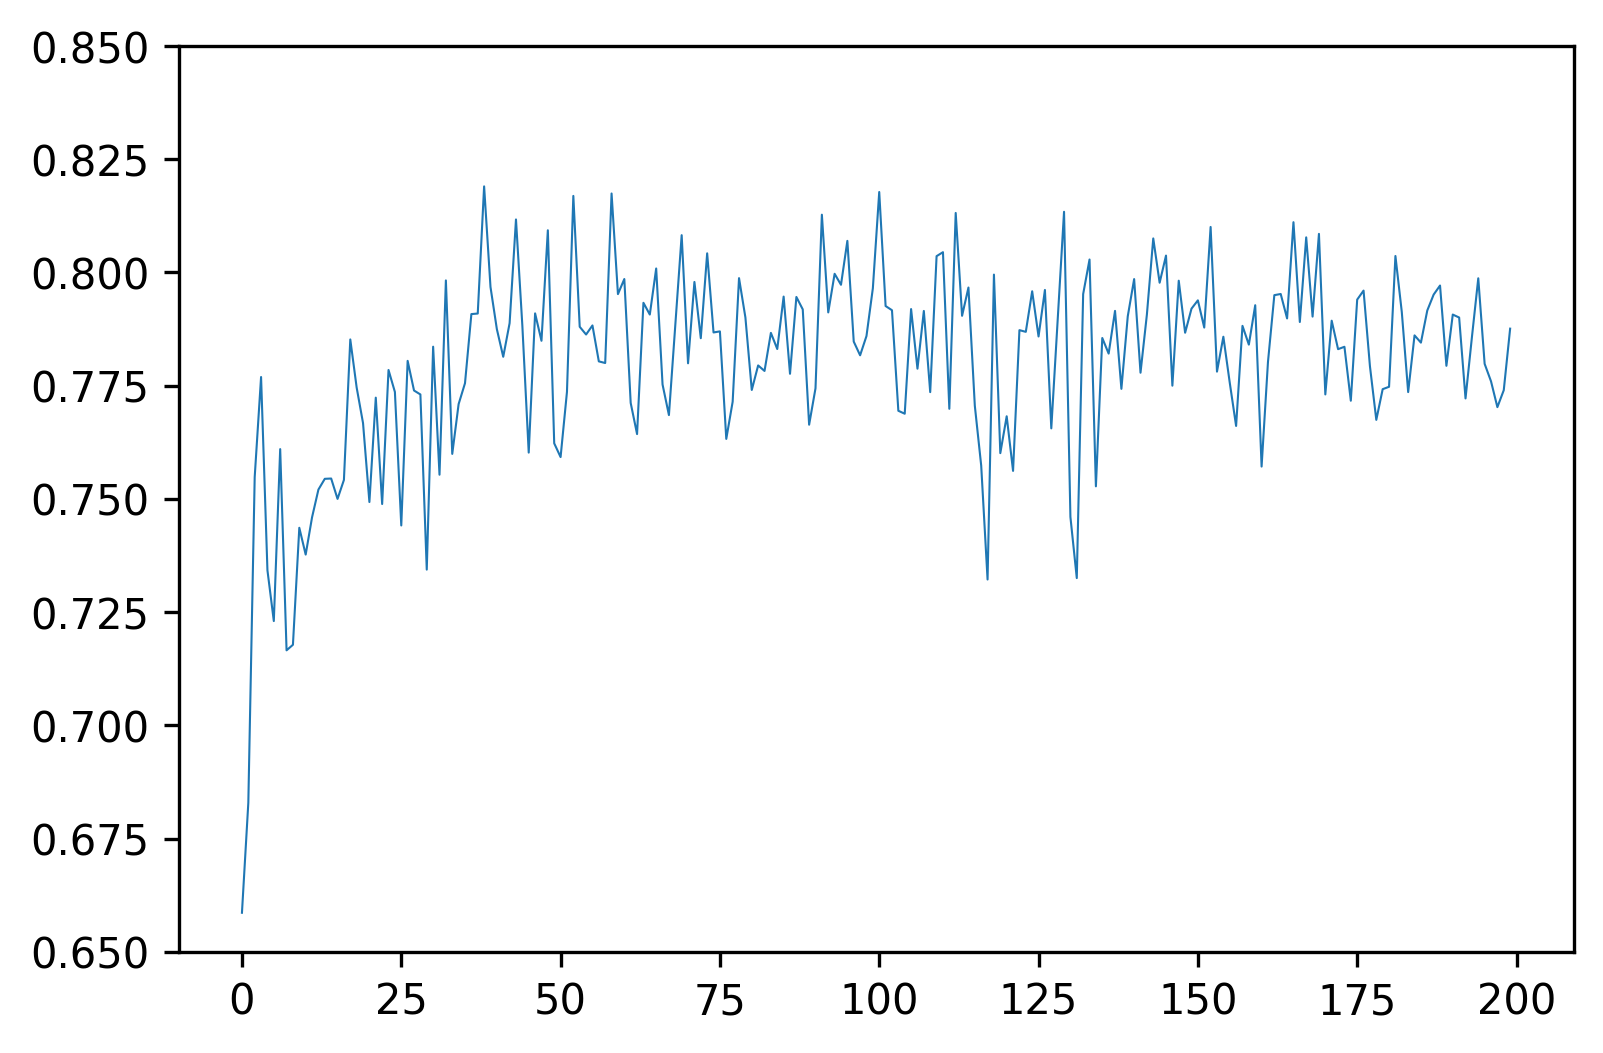

In [48]:
plot_curves(collect(curve_list, 'val'), ylim=[0.65, 0.85], agg=np.mean, err_agg=np.std)
plot_curves(collect(curve_list, 'val'), ylim=[0.65, 0.85])

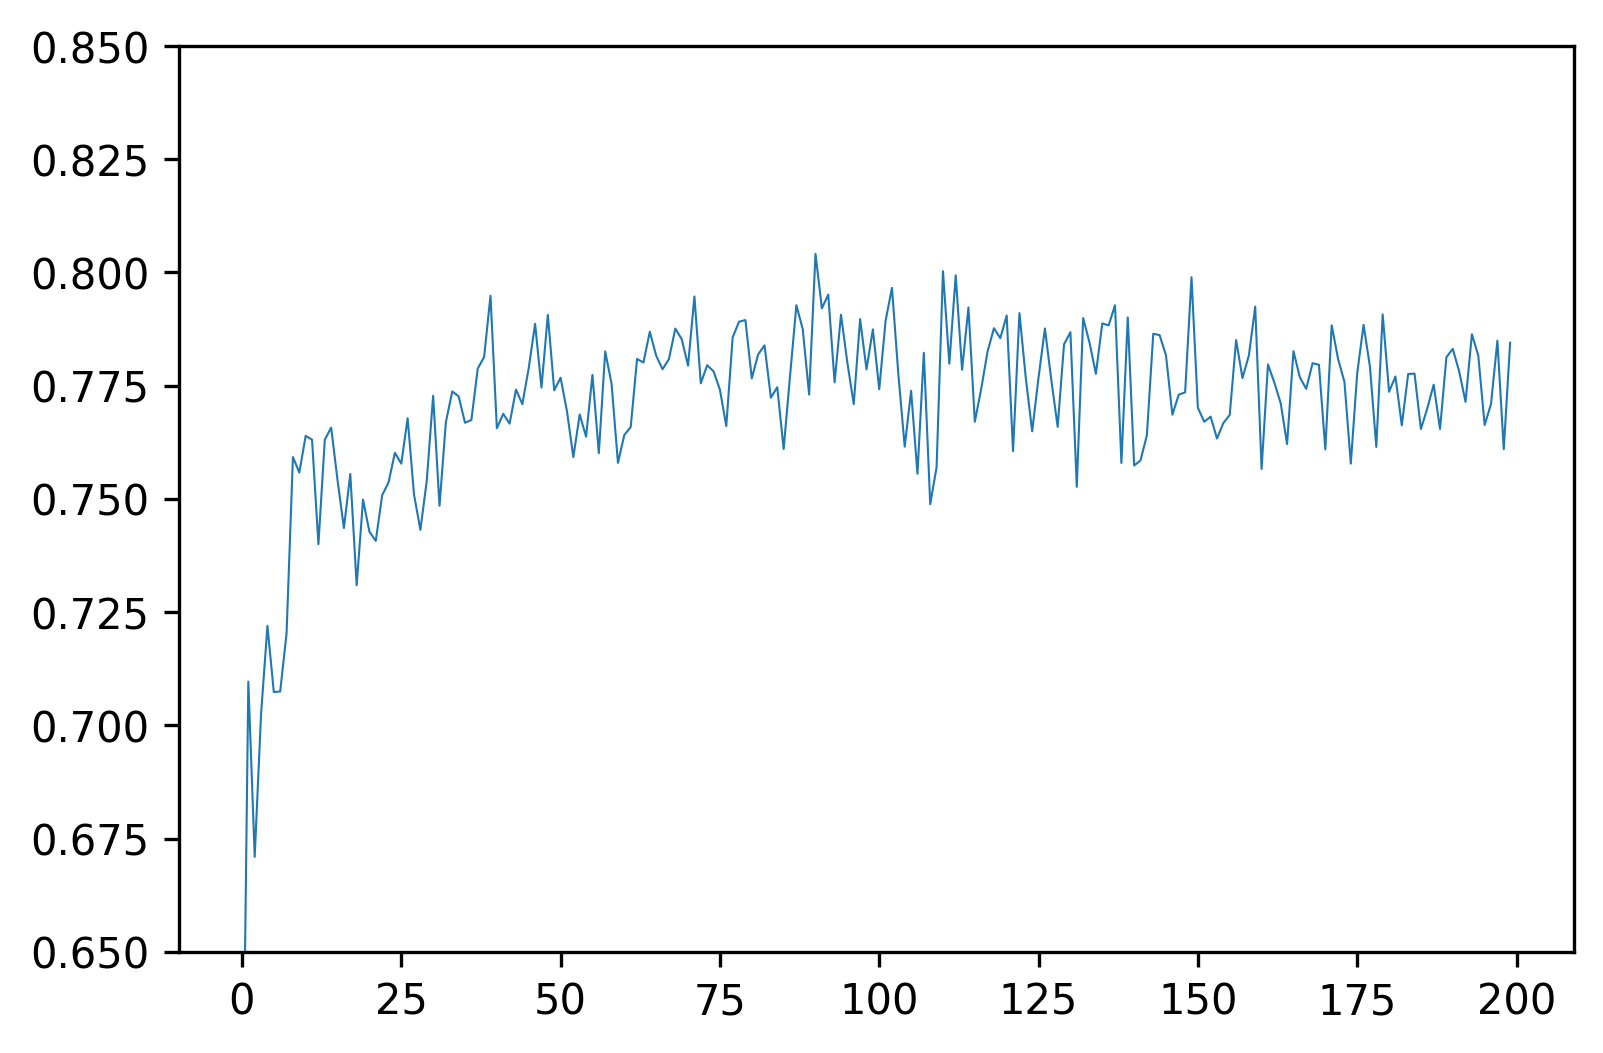

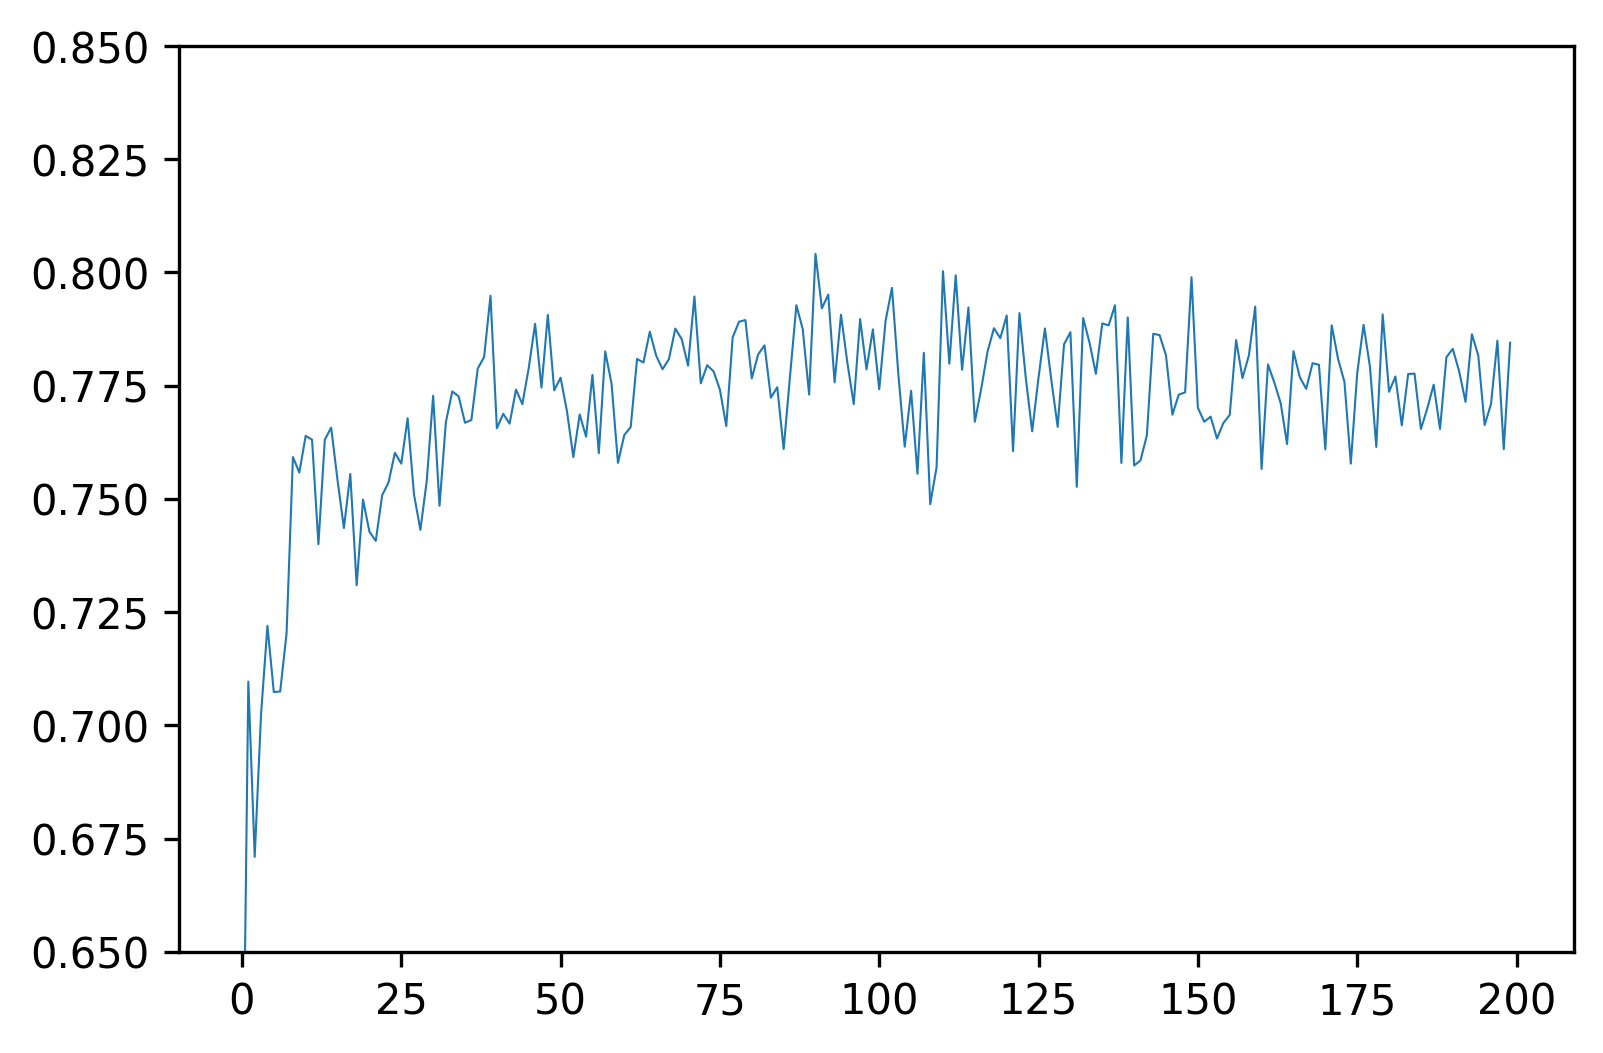

In [49]:
plot_curves(collect(curve_list, 'test'), ylim=[0.65, 0.85], agg=np.mean, err_agg=np.std)
plot_curves(collect(curve_list, 'test'), ylim=[0.65, 0.85])

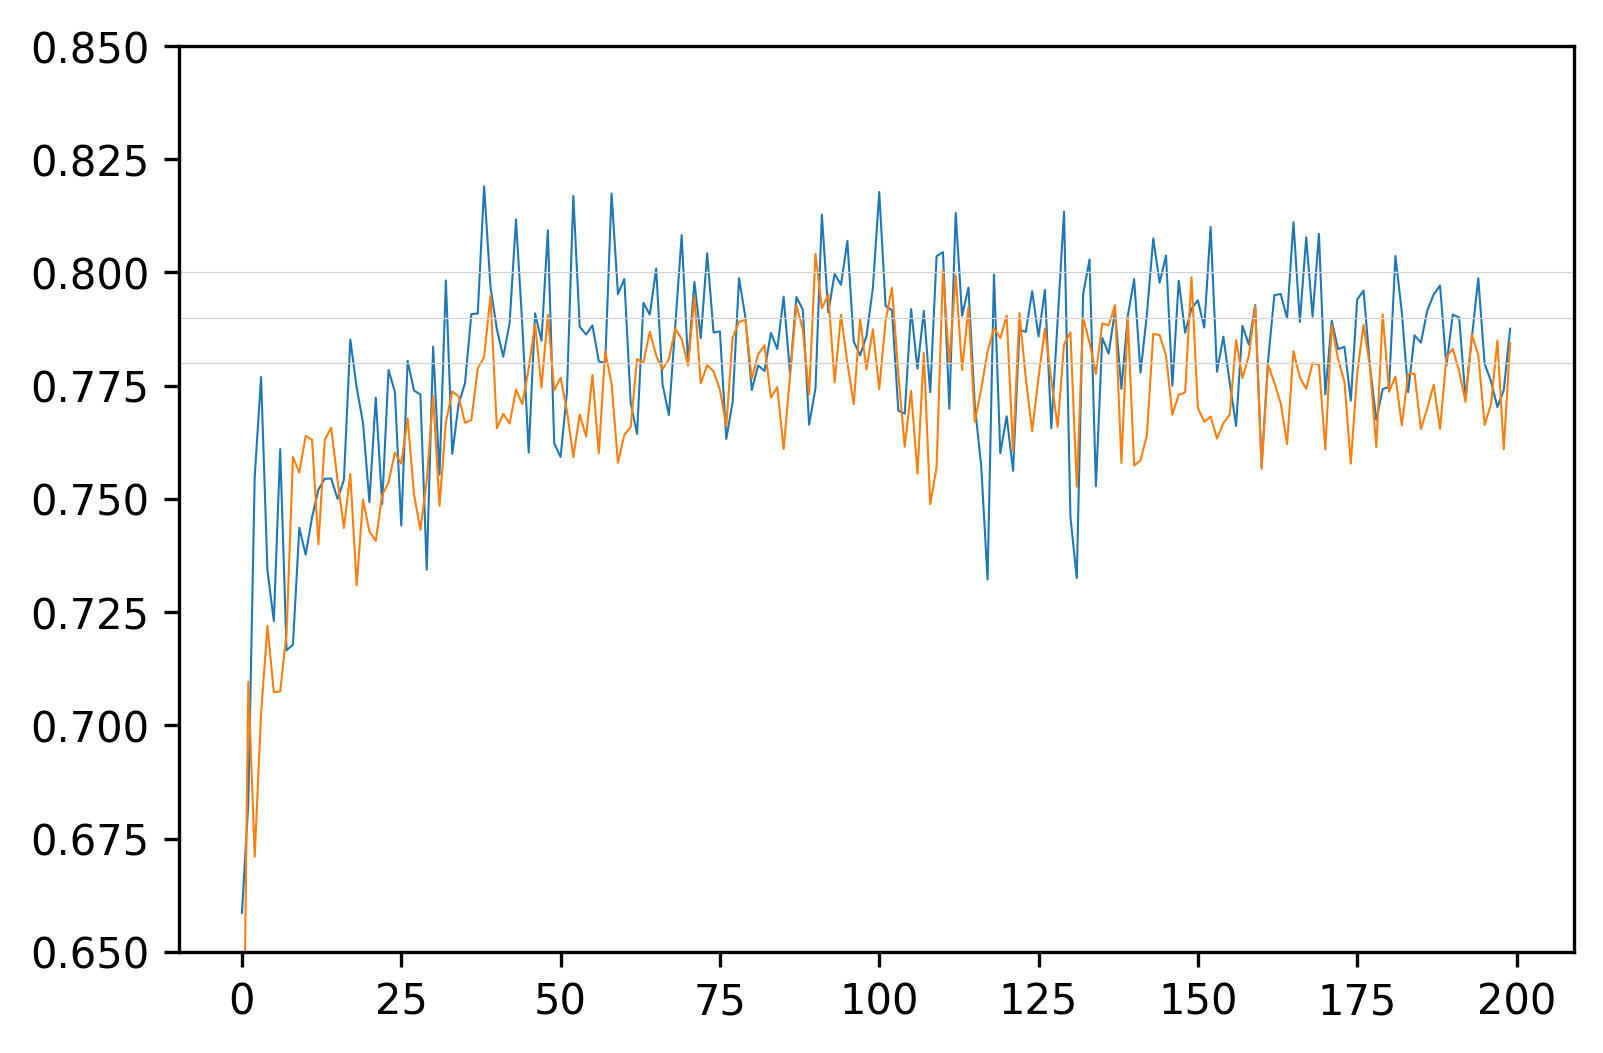

In [50]:
input_data = zip(collect(curve_list, 'val'), collect(curve_list, 'test'))
for val_curve, test_curve in input_data:
    plot_curves([val_curve, test_curve], ylim=[0.65, 0.85], anchors=[0.78, 0.79, 0.80])